In [8]:
import os
import pandas as pd

# Pretend your current working directory is the "project" root
current_dir = os.getcwd()  # This returns the current working directory
data_path = os.path.join(current_dir, 'data')

print("Files in dataset directory:")
print(os.listdir(data_path))

# Load the CSV (adjust file name as per listing)
df_train = pd.read_csv(os.path.join(data_path, "train.csv"))  # or test.csv
df_train.head()


Files in dataset directory:
['data_loader.py', 'test.csv', 'train.csv']


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
df_test = pd.read_csv(os.path.join(data_path, "test.csv"))  # or test.csv
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [10]:
print(df_train.info())         # Data types, missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
print(df_train.describe())     # Numeric stats

       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.00000

In [12]:
print(df_train.isnull().sum()) # Missing values check

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [13]:
df_train = df_train.dropna() 

In [14]:
print(df_train['price_range'].value_counts())

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


In [15]:
df_train.shape

(2000, 21)

In [16]:
from sklearn.preprocessing import StandardScaler

X = df_train.drop("price_range", axis=1)
y = df_train["price_range"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

<Axes: >

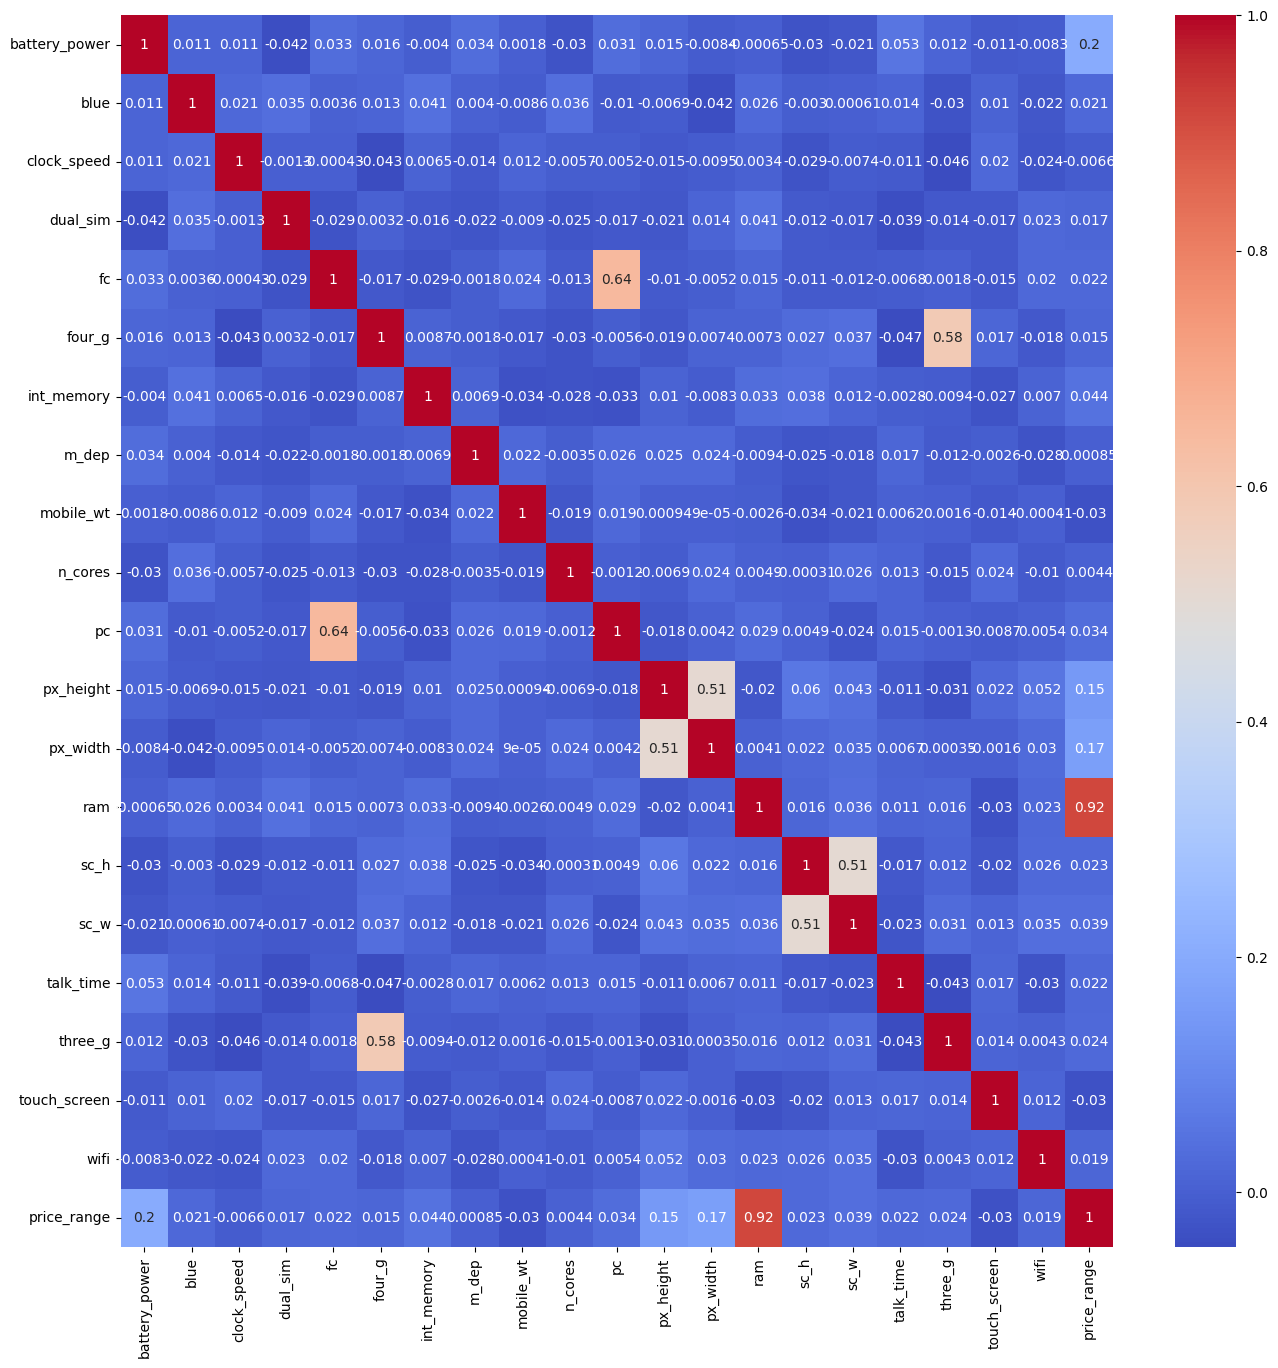

In [18]:
# Example: Using correlation to drop redundant features
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_train.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

import mlflow
import mlflow.sklearn  # for scikit-learn models
from mlflow.models.signature import infer_signature

# Optional: Set experiment name
mlflow.set_experiment("Model_Comparison_Experiment")

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'MLP': MLPClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models.items():
    with mlflow.start_run(run_name=name):
        model.fit(X_train, y_train)

        score = model.score(X_test, y_test)
        print(f'{name}: {score:.4f}')

        # Log parameters (if available)
        if hasattr(model, "get_params"):
            params = model.get_params()
            mlflow.log_params(params)
        
        mlflow.log_metric("accuracy", score)

         # Prepare input example and infer signature
        input_example = X_test[:5]
        signature = infer_signature(X_train, model.predict(X_train))

        # Log model with signature and input example
        mlflow.sklearn.log_model(
            model,
            artifact_path="model",
            input_example=input_example,
            signature=signature
        )

        print(f"Run ID: {mlflow.active_run().info.run_id}")
    

Logistic Regression: 0.9650
Run ID: 7cb099cf000a4f9cb433c24c9417a4dc
Random Forest: 0.8700
Run ID: b293e63970624a4683911a56a0fdeb4b
Decision Tree: 0.8525
Run ID: 169728f9ada34e5d94ce7cdd3299190c
KNN: 0.5075
Run ID: 23674e4235734a87a2047f561361916a
SVM: 0.8950
Run ID: bca7ae153d2749e98e3aef0f0a1739c6
Naive Bayes: 0.8100
Run ID: e8300c82d55a472ab52f2d92f38fcba8


c:\Users\Asus\Documents\Machine Learning Projects\mobile_price_classification\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP: 0.9375
Run ID: c41ff8448d1441afb664d80dc2edca81
Gradient Boosting: 0.9150
Run ID: 7f4e556ba353478aa524abefb00ce7f4


In [ ]:
trained_models = {}

for name, model in models.items():
    trained_model = model.fit(X_train, y_train)
    trained_models[f"{name}_model"] = trained_model
    score = trained_model.score(X_test, y_test)
    print(f'{name}: {score:.4f}')


Logistic Regression: 0.9650
Random Forest: 0.8850
Decision Tree: 0.8600
KNN: 0.5075
SVM: 0.8950
Naive Bayes: 0.8100


c:\Users\Asus\Documents\Machine Learning Projects\mobile_price_classification\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP: 0.9350
Gradient Boosting: 0.9150


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

model_xgb = xgb.XGBClassifier(
    objective='multi:softmax',     # for multi-class classification
    num_class=4,                   # number of classes in target
    eval_metric='mlogloss',       # suitable for multi-class
    use_label_encoder=False,
    random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

trained_models["xgboost_model"] = model_mcl

c:\Users\Asus\Documents\Machine Learning Projects\mobile_price_classification\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:48:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.935

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       0.94      0.93      0.93       100
           2       0.87      0.90      0.89       100
           3       0.96      0.91      0.93       100

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.93       400
weighted avg       0.94      0.94      0.93       400



In [ ]:
from sklearn.linear_model import LogisticRegression

# Use solver='lbfgs' and multi_class='multinomial' for softmax
model_mcl = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_mcl.fit(X_train, y_train)

y_pred = model_mcl.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.965

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.96      0.96      0.96       100
           2       0.95      0.94      0.94       100
           3       0.96      0.98      0.97       100

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400



c:\Users\Asus\Documents\Machine Learning Projects\mobile_price_classification\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [20]:
trained_models["mulitnomial classification_model"] = model_mcl

In [24]:
trained_models["scaler"] = scaler

In [25]:
print(trained_models)

{'Logistic Regression_model': LogisticRegression(), 'Random Forest_model': RandomForestClassifier(), 'Decision Tree_model': DecisionTreeClassifier(), 'KNN_model': KNeighborsClassifier(), 'SVM_model': SVC(), 'Naive Bayes_model': GaussianNB(), 'MLP_model': MLPClassifier(), 'Gradient Boosting_model': GradientBoostingClassifier(), 'mulitnomial classification_model': LogisticRegression(max_iter=1000, multi_class='multinomial'), 'xgboost_model': LogisticRegression(max_iter=1000, multi_class='multinomial'), 'scaler': StandardScaler()}


In [26]:
import os
import pickle

# Directory to store trained models
model_dir = "trained_models"
os.makedirs(model_dir, exist_ok=True)  # Create folder if it doesn't exist

# Save each model as a separate .pkl file inside the folder
for name, model in trained_models.items():
    filepath = os.path.join(model_dir, f"{name}.pkl")
    with open(filepath, 'wb') as f:
        pickle.dump(model, f)
